# CSE-221710309053-Hari Sarmishta

## Question:
### Read the data from the below URL:
https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/iris.csv

* Get the frequency of the output categories and visualize it

* Apply the Decision Tree Algorithm and Visualize the Decision Tree

* Compare the performance of training scores and testing scores and check whether the model is overfitting to the data

* In order to overcome OverFitting, apply some hyper parameter tuning with help of GridSearch and build the model with the best parameters given by GridSearch

https://docs.google.com/document/d/1s1fKDyTAEHgV66MEPhdhWMosTtcaw8zbXL3S9XC6Ftg/edit?usp=sharing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/iris.csv")
df.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [3]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
df.drop(df[df.duplicated()].index,inplace=True)

In [7]:
df.shape

(149, 5)

In [8]:
df.isna().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [9]:
df.Species.value_counts()

setosa        50
versicolor    50
virginica     49
Name: Species, dtype: int64

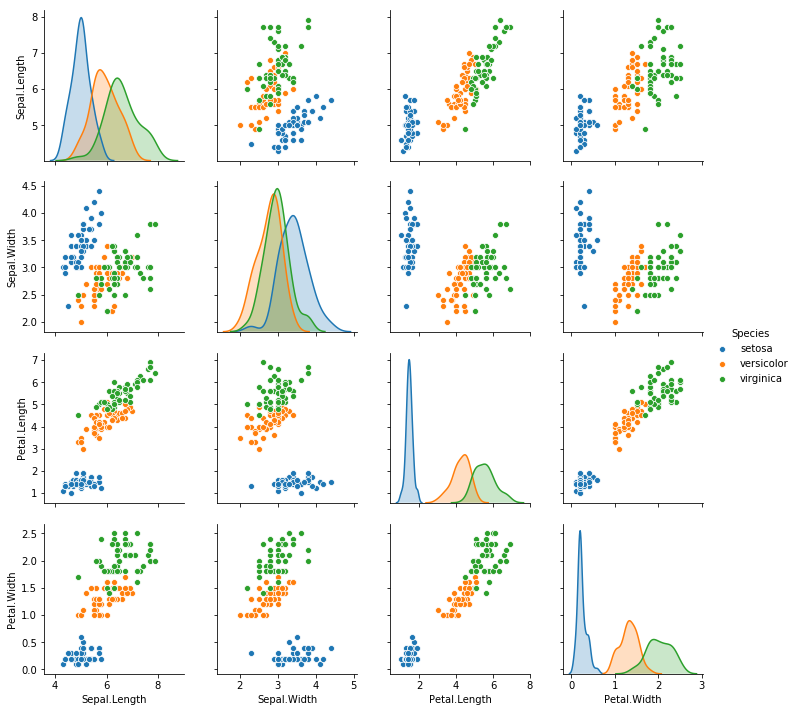

In [10]:
sns.pairplot(df,hue="Species")

In [11]:
df.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.118129,0.873738,0.820620
Sepal.Width,-0.118129,1.000000,-0.426028,-0.362894
Petal.Length,0.873738,-0.426028,1.000000,0.962772
Petal.Width,0.820620,-0.362894,0.962772,1.000000


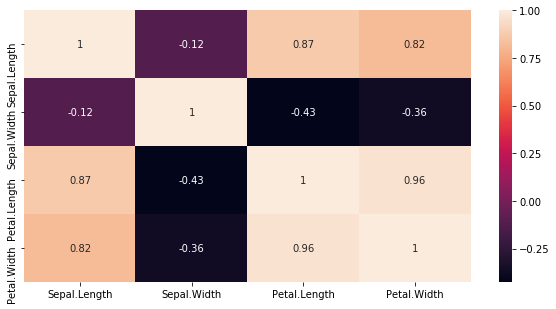

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

In [13]:
X=df.drop("Species",axis=1)
X

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [14]:
y=df.Species
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
5         setosa
6         setosa
7         setosa
8         setosa
9         setosa
10        setosa
11        setosa
12        setosa
13        setosa
14        setosa
15        setosa
16        setosa
17        setosa
18        setosa
19        setosa
20        setosa
21        setosa
22        setosa
23        setosa
24        setosa
25        setosa
26        setosa
27        setosa
28        setosa
29        setosa
         ...    
119    virginica
120    virginica
121    virginica
122    virginica
123    virginica
124    virginica
125    virginica
126    virginica
127    virginica
128    virginica
129    virginica
130    virginica
131    virginica
132    virginica
133    virginica
134    virginica
135    virginica
136    virginica
137    virginica
138    virginica
139    virginica
140    virginica
141    virginica
143    virginica
144    virginica
145    virginica
146    virginica
147    virgini

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(119, 4)
(119,)
(30, 4)
(30,)


In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [18]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
y_train_pred=dtc.predict(X_train)

In [20]:
accuracy_score(y_train,y_train_pred)

1.0

In [21]:
confusion_matrix(y_train,y_train_pred)

array([[40,  0,  0],
       [ 0, 37,  0],
       [ 0,  0, 42]], dtype=int64)

In [22]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       1.00      1.00      1.00        37
   virginica       1.00      1.00      1.00        42

   micro avg       1.00      1.00      1.00       119
   macro avg       1.00      1.00      1.00       119
weighted avg       1.00      1.00      1.00       119



In [23]:
y_pred=dtc.predict(X_test)

In [24]:
accuracy_score(y_test,y_pred)

0.9333333333333333

In [25]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0, 12,  1],
       [ 0,  1,  6]], dtype=int64)